In [ ]:
# !pip install kaggle
# from google.colab import files
# files.upload()

In [ ]:
# !kaggle competitions download -c playground-series-s3e2

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# from google.colab import auth
# auth.authenticate_user()

In [ ]:
# !unzip 'playground-series-s3e2.zip'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

train.head(4)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0


In [ ]:
train.shape, test.shape, submission.shape

((15304, 12), (10204, 11), (10204, 2))

In [ ]:
submission.head()

,id,stroke
0,15304,0.041296
1,15305,0.041296
2,15306,0.041296
3,15307,0.041296
4,15308,0.041296


In [ ]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [ ]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
train = train.drop(['id','ever_married','work_type','Residence_type'], axis=1)
train.head(8)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,79.53,31.1,never smoked,0
1,Male,33.0,0,0,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,103.00,40.3,Unknown,0
3,Male,56.0,0,0,64.87,28.8,never smoked,0
4,Female,24.0,0,0,73.36,28.8,never smoked,0
5,Female,34.0,0,0,84.35,22.2,Unknown,0
6,Female,53.0,0,0,88.97,25.3,never smoked,0
7,Male,78.0,0,1,75.32,24.8,Unknown,0


In [ ]:
# id = int(test.loc[test['gender']=='Other'].id)
# submission = submission[submission.id != id]
# submission.shape

In [ ]:
train = train[train.gender != 'Other']

In [ ]:
train['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
train['smoking_status'] = train['smoking_status'].apply(lambda x: 0 if x in('Unknown','never smoked') else 1)

In [ ]:
train['smoking_status'].unique()

array([0, 1])

In [ ]:
train['gender'] = train['gender'].apply(lambda x: 0 if x == 'Female' else 1)

In [ ]:
train['gender'].unique()

array([1, 0])

In [ ]:
train.head(8)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,28.0,0,0,79.53,31.1,0,0
1,1,33.0,0,0,78.44,23.9,1,0
2,0,42.0,0,0,103.00,40.3,0,0
3,1,56.0,0,0,64.87,28.8,0,0
4,0,24.0,0,0,73.36,28.8,0,0
5,0,34.0,0,0,84.35,22.2,0,0
6,0,53.0,0,0,88.97,25.3,0,0
7,1,78.0,0,1,75.32,24.8,0,0


In [ ]:
import seaborn as sns

In [ ]:
def draw_text_by_ax( ax, data ):
    percents = list() # 카운트 바 별 비율을 저장할 그릇
    for bar in ax.patches: # 개별 바 정보 접근
        percent = bar.get_height() / data.shape[0] * 100 # 개별카운트/전체데이터수
        ax.text( x = bar.get_x() + bar.get_width()/2,
                 y = bar.get_y() + bar.get_height() + data.shape[0]*0.005,
                 s = f'{percent:1.1f} %',
                 ha= 'center'
                 )
        percents.append( percent )
    return ax, percents

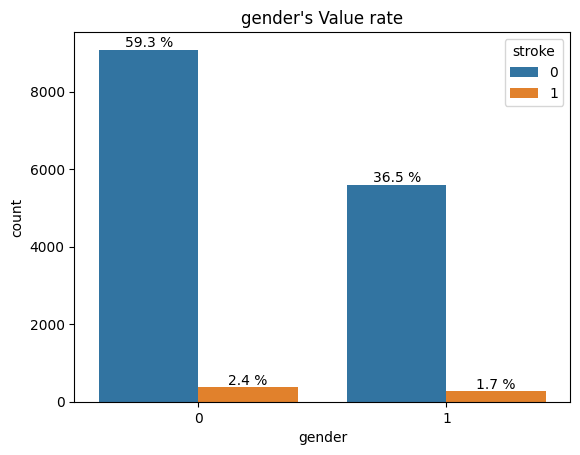

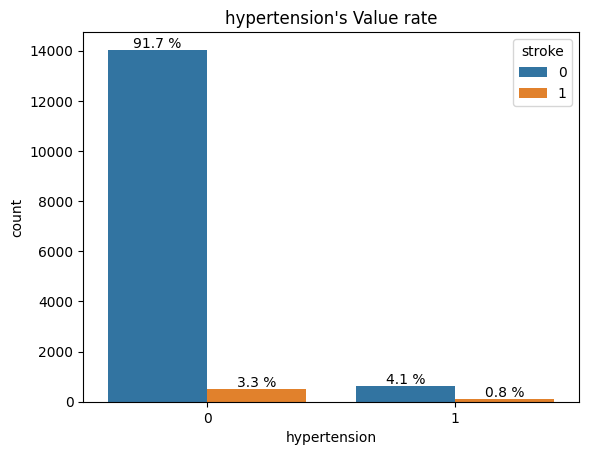

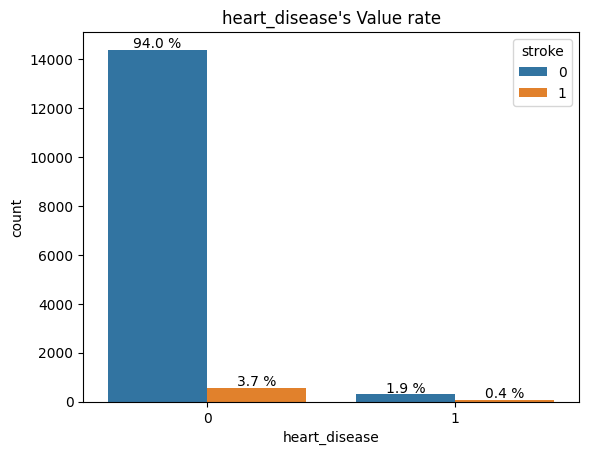

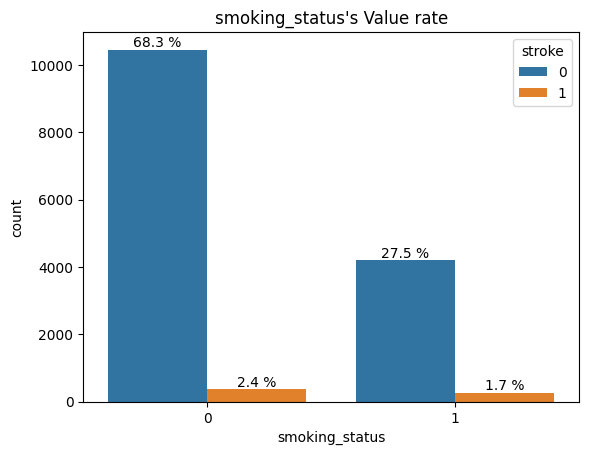

In [ ]:
df_logs = dict()

for column in train.columns:
  if column not in('age','avg_glucose_level','bmi','stroke','work_type'):
    ax, precents = draw_text_by_ax( sns.countplot( data=train, x=column, hue='stroke'), train )
    df_logs[ column ] = precents
    ax.set_title( f'{column}\'s Value rate' )
    plt.show()

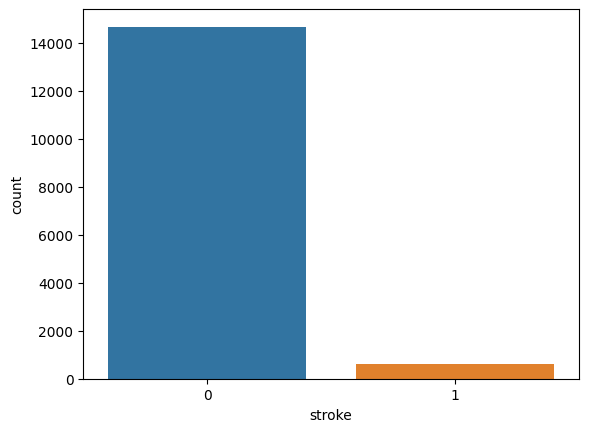

In [ ]:
sns.countplot(data=train,x='stroke',);

In [ ]:
test = test.drop(['id','ever_married','work_type','Residence_type'], axis=1)

test['gender'] = test['gender'].apply(lambda x: 0 if x == 'Female' else 1)

test['smoking_status'] = test['smoking_status'].apply(lambda x: 0 if x in('Unknown','never smoked') else 1)

In [ ]:
train = pd.concat([train, test],ignore_index=True)
train.shape

(25507, 8)

In [ ]:
X_sub = train[pd.isnull(train['stroke'])]  # 정답 없는 것들
X_sub.shape

(10204, 8)

In [ ]:
X = train[~pd.isnull(train['stroke'])]  # 정답 있는 것들
X.shape

(15303, 8)

In [ ]:
y = X['stroke']
X = X.drop(['stroke'],axis=1)
X_sub = X_sub.drop(['stroke'], axis=1)

In [ ]:
X.shape, y.shape, X_sub.shape

((15303, 7), (15303,), (10204, 7))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.15,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13007, 7), (2296, 7), (13007,), (2296,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

clf = LogisticRegression()

grid_params = {
    'C'           :[0.001, 0.01, 0.1, 0.125, 1], # 과적합 방지 규제 강도, 높을수록 강하다. L1, L2
    'max_iter'    :[600, 700, 800, 900 ], # 모델 성능을 높이기 위해 학습의 반복 회수
    'solver'     :['liblinear'],        # 과적합 방지용 L1, L2 모두 지원
    'random_state':[0, 42, 100]     # 난수시드
}

In [ ]:
model = GridSearchCV( clf, grid_params, scoring='roc_auc', cv=5)

In [ ]:
model.fit( X_train, y_train )

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.125, 1],
                         'max_iter': [600, 700, 800, 900],
                         'random_state': [0, 42, 100],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
model.best_params_, model.best_score_

({'C': 1, 'max_iter': 600, 'random_state': 0, 'solver': 'liblinear'},
 0.8802437584366551)

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred = model.best_estimator_.predict_proba( X_test )[ :, 1]

roc_auc_score(y_test,y_pred) # 모델 성능값과 비교해서 과적합 판단

0.8909730027021211

In [ ]:
submission

,id,stroke
0,15304,0.041296
1,15305,0.041296
2,15306,0.041296
3,15307,0.041296
4,15308,0.041296
...,...,...
10199,25503,0.041296
10200,25504,0.041296
10201,25505,0.041296
10202,25506,0.041296


In [ ]:
X_sub

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
15303,0,57.0,0,0,82.54,33.4,0
15304,1,70.0,1,0,72.06,28.5,0
15305,0,5.0,0,0,103.72,19.5,0
15306,0,56.0,0,0,69.24,41.4,1
15307,1,32.0,0,0,111.15,30.1,1
...,...,...,...,...,...,...,...
25502,0,27.0,0,0,75.77,17.6,0
25503,1,49.0,0,0,102.91,26.7,0
25504,0,3.0,0,0,104.04,18.3,0
25505,1,31.0,0,0,82.41,28.7,0


In [ ]:
submission['stroke'] = model.best_estimator_.predict_proba( X_sub )[ :, 1]
# kaggle에 제출할 파일 생성
submission.to_csv( 'mlpro_team_ver9.csv', index=False )